# Введение в машинное обучение для Java-разработчиков
### Практическое задание 1. Линейная регрессия
### Дата выдачи: 18.10.2023

### Дедлайн: 23:59MSK 01.11.2023

## О задании
В этом задании мы попытаемся разобраться в механизме линейной регрессии. 

## Оценивание и штрафы
Каждая из задач (помечены тегом [task]) имеет определенное количество баллов (указана в скобках около задачи). Максимально допустимая оценка за работу — 16 баллов. 

- от 4 до 9 баллов - оценка "3"
- от 10 до 16 баллов - оценка "4"
- 17 баллов - оценка "5"

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов, что автоматически ведет к несдаче курса. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в комментариях. 
В данном задании есть необязательные бонусные задания, выполнение которых добавляет баллы в карму :)

## Формат сдачи
Задания сдаются путем форка основного репозитория, коммита решения в мастер-ветку вашего форка и оповещении преподавателя о выполнении ДЗ. 

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

17

## Часть 1. Одномерная линейная регрессия

Замечание: мы будем реализовывать линейную регрессию, при условии, что свободный коэффициент равен нулю

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid') 
sns.set('notebook', font_scale=1.25, style='whitegrid')

### [task] Прокомментируйте каждую строчку кода в функции create_dataset (1 балл)

In [2]:
def create_dataset(n, slope, noise_stddev, random_state=0):
    random_state = np.random.RandomState(int(random_state))
    x_n = np.linspace(-2, 2, n)
    y_n = slope * x_n + random_state.randn(n) * noise_stddev
    return x_n, y_n

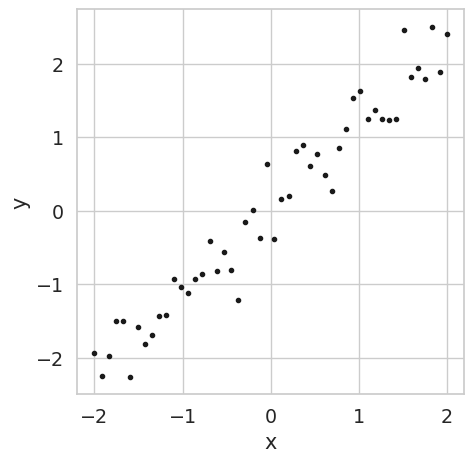

In [3]:
x, y = create_dataset(n=50, slope=1.234, noise_stddev=0.3)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
plt.plot(x, y, 'k.');
plt.xlabel('x');
plt.ylabel('y');

### [task] Реализуйте функции расчета результата 1-мерной линейной модели и MSE (1 балл за каждую фунцкию)

In [4]:
def predict_1d(x, w):
    return np.dot(x, w)

def calc_mean_squared_error(yhat_N, y_N):
    return sum((yhat_N - y_N)**2)/len(yhat_N)

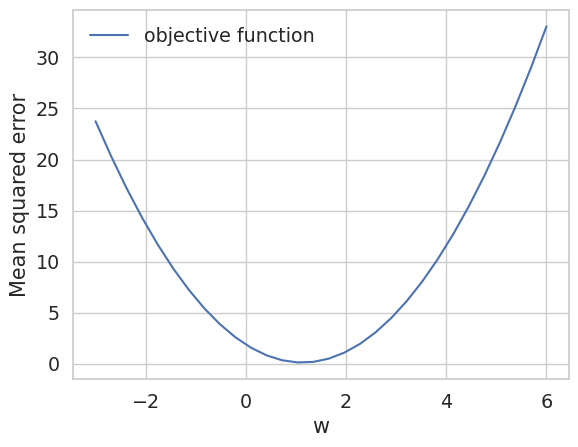

In [5]:
G = 30
w_candidates_G = np.linspace(-3, 6, G)
error_G = np.zeros(G)
for i, w in enumerate(w_candidates_G):
    yhat_N = predict_1d(x, w)
    error_G[i] = calc_mean_squared_error(yhat_N, y)
plt.plot(w_candidates_G, error_G, label='objective function');
plt.xlabel('w');
plt.ylabel('Mean squared error');
plt.legend()

### [task] Найдите методом пристального взгляда по графику из прошлого пункта оптимальное значение параметра w и подставьте найденное значение в переменную w (1 балл)

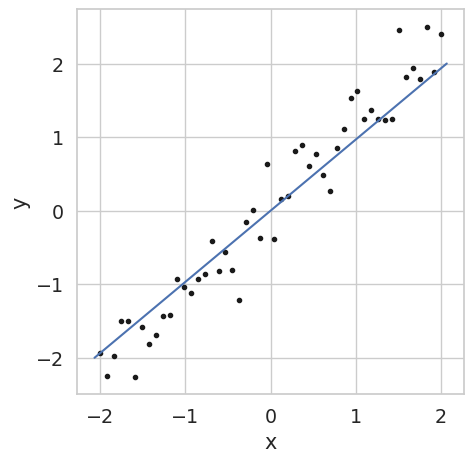

In [6]:
w = w_candidates_G[np.argmin(error_G)] # Fix me 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
plt.plot(x, y, 'k.');
plt.plot([predict_1d(-2,w), predict_1d(2,w)], [-2,2])
plt.xlabel('x');
plt.ylabel('y');

### [task] Что происходит с линейной моделью, когда меняется параметр w (1 балл)?

Все как в школе, w - коэффициент наклона прямой,

## Часть 2. Градиентный спуск

### [task] Реализуйте функцию потерь RSS (1 балл)

In [7]:
def calc_loss(x, y, w):
    return sum((y - np.dot(w, x)) ** 2)

### [task] Реализуйте функцию расчета градиента (2 балл)

hint: Продифференцируйте функцию потерь RSS

In [8]:
def calc_grad(x, y, w):
    return 2 * np.dot(x, np.dot(w, x) - y)

### [task] Допишите код для обновления весов (2 балла)

In [9]:
def minimize_via_grad_descent(calc_loss, calc_grad, init_w=0, step_size=0.001, max_iters=20):
    w = init_w 
    for iter_id in range(max_iters):
        grad = calc_grad(x, y, w)
        w -= step_size * grad
        loss = calc_loss(x, y, w)
        print(f"Loss = {loss}, grad = {grad}, w = {w}") 
    wopt = w    
    return wopt

In [10]:
wopt = minimize_via_grad_descent(calc_loss, calc_grad, step_size=0.001, max_iters=50);

Loss = 70.51044434322475, grad = -156.55658221581643, w = 0.15655658221581645
Loss = 53.59263338232052, grad = -134.8303626430092, w = 0.29138694485882566
Loss = 41.04456404803613, grad = -116.11921027622427, w = 0.40750615513504995
Loss = 31.737565383618396, grad = -100.00470762564619, w = 0.5075108627606961
Loss = 24.834493537911747, grad = -86.12650330208714, w = 0.5936373660627833
Loss = 19.714432535950813, grad = -74.17425386424648, w = 0.6678116199270298
Loss = 15.916844266591317, grad = -63.8806839402286, w = 0.7316923038672584
Loss = 13.100144102657062, grad = -55.01560943423769, w = 0.786707913301496
Loss = 11.01097612267344, grad = -47.38079016581287, w = 0.8340887034673089
Loss = 9.46142430864843, grad = -40.80549683667966, w = 0.8748942003039886
Loss = 8.312109917774507, grad = -35.1426931940384, w = 0.910036893498027
Loss = 7.459654674191034, grad = -30.265748016090214, w = 0.9403026415141171
Loss = 6.827382122761135, grad = -26.065603393449134, w = 0.9663682449075662
Loss

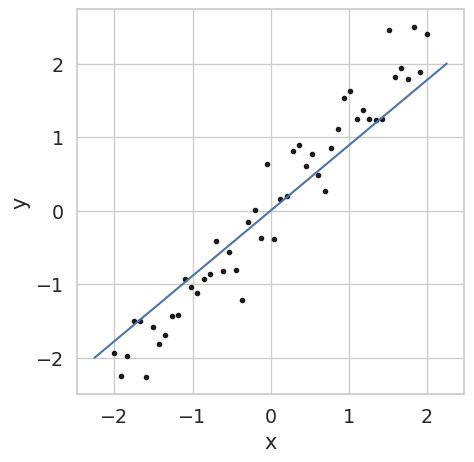

In [11]:
w = wopt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
plt.plot(x, y, 'k.');
plt.plot([predict_1d(-2,w), predict_1d(2,w)], [-2,2])
plt.xlabel('x');
plt.ylabel('y');

### [task] Что будет если сделать слишком маленький шаг или слишком большой (1 балл)
hint: Попробуйте увеличить число итераций
Если шаг будет слишком маленький, то банально потребуется слишком большое количетсов итераций.

Если же шаг будет слишком большим, то при спуске мы можем "перепрыгивать" необходимый минимум.

Особенно это влияет в случае функций с высокой "овражностью", то есть у таких, где снижение к минимуму по одной оси происходит сильно быстрее, чем по другой.

Из-за этого вектор градиента при заходе по одной оси может быть слишком большим из-за быстрого перепада, из-за чего алгоритм может "перескочить" минимум,
в то время как при заходе по другой оси тот же шаг будет требовать неприемлемо большого числа итераций.

## Часть 3. 

В данной части мы будем учиться использовать готовую реализацию линейной регрессии из библиотеки scikit-learn на небольшой, но реальной задаче из медицины. Обязательно изучите описание датасета (признаки и целевая переменная).

In [12]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

diabetes = load_diabetes(as_frame=True)
data = diabetes["frame"]
print(diabetes["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [13]:
X = data.drop(labels='target', axis=1) 
y = data['target']

In [14]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(331, 10)
(111, 10)
(331,)
(111,)


### [task] Напишите код для обучения модели и предсказания модели на тестовой выборке (2 балла)
Чтобы выполнить задание, воспользуйтесь документацией для класса SGDRegressor

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = SGDRegressor()
model = make_pipeline(StandardScaler(), model)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 2846.676432309152


### [task] Попробуйте улучшить результат за счет изменения гиперпараметров линейной модели (2 балла)

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regressor = SGDRegressor(max_iter=100000, alpha=0.15, learning_rate='adaptive')
model = make_pipeline(StandardScaler(), regressor)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 2804.627643716129


### Какие признаки больше всего влияют на целевую переменную? Выберите 3 признака. (2 балла)
hint: посмотрите на полученные веса модели

In [18]:
regressor.coef_

array([  2.3275242 ,  -9.38405757,  23.40202408,  15.88846028,
        -5.13329856,  -3.95468441, -10.37530105,   7.17223273,
        17.24566984,   3.08641472])

In [19]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
16,-0.005515,-0.044642,0.042296,0.049415,0.024574,-0.023861,0.074412,-0.039493,0.052277,0.027917
408,0.063504,-0.044642,-0.050396,0.107944,0.031454,0.019354,-0.017629,0.023608,0.058038,0.040343
432,0.009016,-0.044642,0.055229,-0.005670,0.057597,0.044719,-0.002903,0.023239,0.055686,0.106617
316,0.016281,0.050680,0.014272,0.001215,0.001183,-0.021355,-0.032356,0.034309,0.074966,0.040343
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362


Главные факторы: индекс массы тела, логарифм количества триглицеридов и среднее давление

# Бонусные вопросы:
- Если вы нашли признаки, которые наибольшим образом влияют на модель, проверьте согласуется ли это с медициной в реальности ?
- Есть ли какие-то проблемы в текущей схеме обучения и валидации модели? 

Ответы пишите в ячейке ниже

* Риск развития сахарного диабета увеличивался по мере увеличения значений индекса массы тела, начиная с 20-21 кг/м2 - [Источник](https://internist.ru/publications/detail/svyaz-mezhdu-izmeneniem-indeksa-massy-tela-i-razvitiem-sakharnogo-diabeta/). Стоит выделить, что исследовались не кейсы "пост-фактум", а изначально наблюдение начинали еще в тот момент, когда у человека не наблюдался диабет.
* Для диабета типа 2 характерна так называемая "липидная триада", или диабетическая дислипидемия: увеличение концентрации триглицеридов... - [Источник](https://www.probl-endojournals.ru/jour/article/view/11683?locale=ru_RU)
* Among the overall cohort, 20 mm Hg higher SBP and 10 mm Hg higher diastolic BP were associated with a 58% and a 52% higher risk of new-onset diabetes - [Источник](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4595710/). Аналогично первому исследованию, наблюдение начинали еще в тот момент, когда у человека не наблюдался диабет.

На примере последнего исследования нетрудно заметить, что связь у некоторых показателей нелинейная (в данном случае увеличение показателя в два раза привело лишь к незначительному увеличению риска развития диабета). По многим другим из приведенных показателей так же существуют гипотезы их связи и не все из них линейны, требуется добавить "производные" (то есть связанные с используемыми некоторой функцией) показатели в соответствии с существующими в науке концепциями.